In [122]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [123]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [124]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [125]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Let's create a fast model linear regression model and set our baseline score in 10min.

In [126]:
#select categorical columns then apply describe function
train.select_dtypes(include=['object']).dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [127]:
#first thing i notice is that mszoing have 5 categories, but in describtion has 8
train.select_dtypes(include=['object']).nunique() 

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [128]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 

In [129]:
train = train.bfill()

In [130]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [131]:
X.shape

(1460, 79)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [133]:
cat_columns = train.select_dtypes(include=['object']).columns
num_columns = list(set(X_train.columns) - set(cat_columns))
# cat_columns

In [134]:
from sklearn.compose import ColumnTransformer

cat_columns = train.select_dtypes(include=['object']).columns
num_columns = list(set(X_train.columns) - set(cat_columns))
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),       # One-hot encode categorical columns
        ('num', StandardScaler(), num_columns)        # Scale numeric columns
    ]
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('regressor', LinearRegression())               # Linear regression model
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Ex...
                                                   'OverallQual', 'MiscVal',
                                                   '2ndFlrSF', 'TotRmsAbvGrd',
                                                   'Fireplaces', 'WoodDeckSF',
                                                   'GrLivArea', '1stFlrSF',
                                                   'LotFrontage',
                                                   'YearRemodAdd',
                                                   'BsmtHalfBath',
                                                   'OpenPorchSF',
                                                   'BsmtFullBath',
                                                   'KitchenAbvGr',
                                                   'LowQualFinSF', 'PoolArea',
                                                   'BsmtFinSF1', '3SsnPorch',
                                                   'BsmtFinSF2',
                                                   'EnclosedPorch',
                                                   'TotalBsmtSF', 'GarageYrBlt',
                                                   'MoSold', 'GarageArea',
                                                   'FullBath', ...])])),
                ('regressor', LinearRegression())])

In [135]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred, y_test)

0.048423497954620455

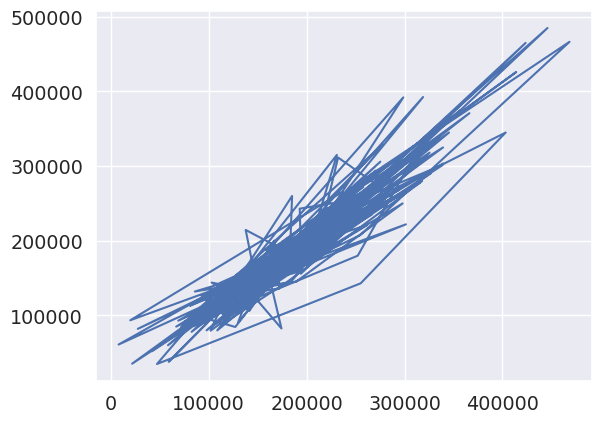

In [136]:
import matplotlib.pyplot as plt
plt.plot(y_pred, y_test)

In [137]:
test = test.bfill()
test_pred = pipeline.predict(test)

In [138]:
test_pred

array([112279.57125546, 154923.9941314 , 189013.89917355, ...,
       167691.37381312,  98522.58364646, 230248.14478224])

In [139]:
sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [140]:
sub['SalePrice'] = test_pred

In [141]:
sub

,Id,SalePrice
0,1461,112279.571255
1,1462,154923.994131
2,1463,189013.899174
3,1464,199101.389219
4,1465,197182.002395
...,...,...
1454,2915,86531.294197
1455,2916,84340.253371
1456,2917,167691.373813
1457,2918,98522.583646


In [142]:
sub.to_csv('submission.csv',index=False)

# let's start the real work
improve preparing the data<br>
and use advanced models

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
cat_columns = train.select_dtypes(include=['object']).columns
num_columns = list(set(X_train.columns) - set(cat_columns))
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),       # One-hot encode categorical columns
        ('num', StandardScaler(), num_columns)        # Scale numeric columns
    ]
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('regressor', RandomForestRegressor())               # Linear regression model
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Ex...
                                                   '2ndFlrSF', 'TotRmsAbvGrd',
                                                   'Fireplaces', 'WoodDeckSF',
                                                   'GrLivArea', '1stFlrSF',
                                                   'LotFrontage',
                                                   'YearRemodAdd',
                                                   'BsmtHalfBath',
                                                   'OpenPorchSF',
                                                   'BsmtFullBath',
                                                   'KitchenAbvGr',
                                                   'LowQualFinSF', 'PoolArea',
                                                   'BsmtFinSF1', '3SsnPorch',
                                                   'BsmtFinSF2',
                                                   'EnclosedPorch',
                                                   'TotalBsmtSF', 'GarageYrBlt',
                                                   'MoSold', 'GarageArea',
                                                   'FullBath', ...])])),
                ('regressor', RandomForestRegressor())])

In [144]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred, y_test)

0.026489667210221276

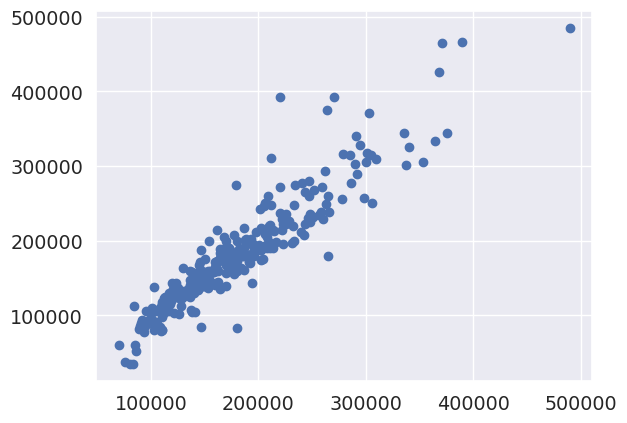

In [145]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)

In [146]:
def submit(test,file_path='submission.csv'):
    test_pred = pipeline.predict(test)
    sub['SalePrice'] = test_pred
    sub.to_csv(file_path,index=False)
submit(test, "submission.csv")

# preprocessing data

In [147]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [148]:
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [149]:
info = pd.DataFrame()

In [150]:
info['variable'] = list(set(cat_columns).union(set(num_columns)))

In [151]:
info['type'] = ['categorical']* len(cat_columns) + ['numerical'] * len(num_columns)

In [152]:
info

,variable,type
0,MasVnrType,categorical
1,GarageFinish,categorical
2,Heating,categorical
3,CentralAir,categorical
4,ScreenPorch,categorical
...,...,...
74,YearBuilt,numerical
75,MasVnrArea,numerical
76,PavedDrive,numerical
77,HalfBath,numerical


In [153]:
info[['segment','Expectation','Conclusion','Comments']] = None

In [154]:
info

,variable,type,segment,Expectation,Conclusion,Comments
0,MasVnrType,categorical,None,None,None,None
1,GarageFinish,categorical,None,None,None,None
2,Heating,categorical,None,None,None,None
3,CentralAir,categorical,None,None,None,None
4,ScreenPorch,categorical,None,None,None,None
...,...,...,...,...,...,...
74,YearBuilt,numerical,None,None,None,None
75,MasVnrArea,numerical,None,None,None,None
76,PavedDrive,numerical,None,None,None,None
77,HalfBath,numerical,None,None,None,None


In [155]:
info.loc[info['variable'] == 'MSZoning', 'Expectation'] = 'High'

In [156]:
info.loc[info['variable'] == 'MSSubClass', 'segment'] = 'building'

In [157]:
# Open the file in read mode
with open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r") as file:
    # Read the entire file as a string
    content = file.read()

# Print the content
print(content)


rows={'MSSubClass':['high', 'building'],
      'MSZoning':['high', 'location'],
      'LotFrontage':['high', 'spacing'],
      'LotArea':['high', 'spacing'],
      'Street':['medium', 'location'],
      'Alley':['low', 'location'],
      'LotShape':['medium', 'building'],
      'LandContour':['medium', 'location'],
      'Utilities':['high', 'building'],
      'LotConfig':['high', 'location'],
      'LandSlope':['low', 'location'],
      'Neighborhood':['medium', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      'MSZoning':['high', 'location'],
      }

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [159]:
num_columns.append('SalePrice')

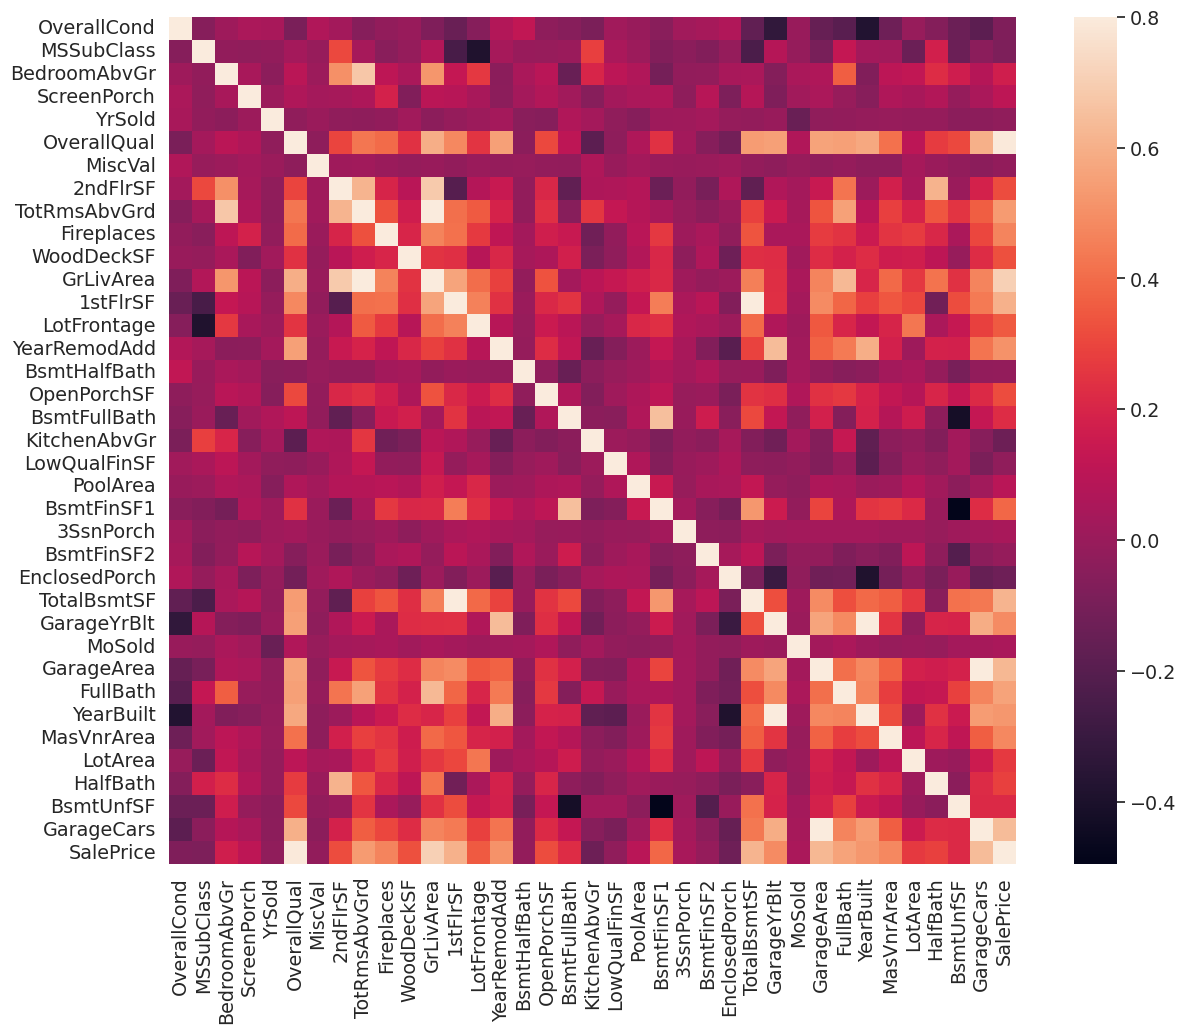

In [160]:
#correlation matrix
corrmat = train[num_columns].corr()
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(corrmat, vmax=.8, square=True);

notices<br>
1. there are high correlation between totalbasmtsf and 1stflrse
2. there are high correlation between GarageArea and GarageCars
3. there are high correlation between GArageYrBlt and YearBuilt
4. there are high correlation between GrlivArea and TotRmsAbovGrd
5. there are high correlation between OverallQual and SalePrice

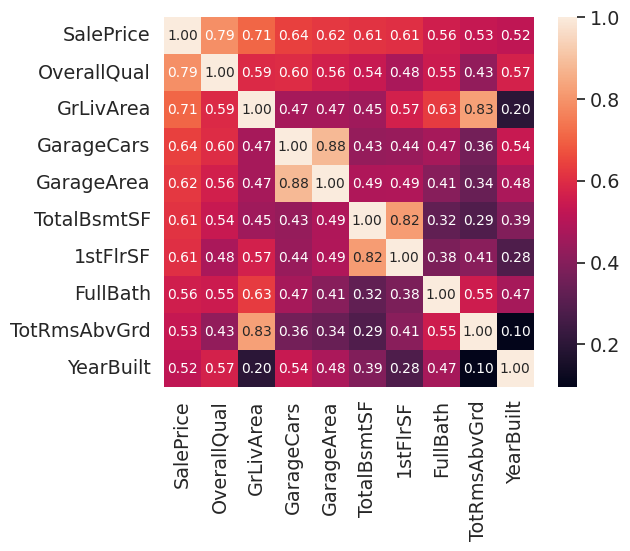

In [161]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

the information we take from this heatmap is:
1. these variables are have the highest correlations with saleprice
2. there are high correlation between GarageCar and GarageArea which we aleady now from before.
3. there are high correlation between TotRmsAbvGrd and GrlivArea

In [162]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [163]:
#these are the features that have more than 15% missing data we will check if they are really matter or not if we drop them.
missing_data.loc[missing_data['Percent']> 0.15].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

## How to deal with missing data
1. PoolQC have high missing data ratio and that could indicate that in this dataset it doesn't matter and buyers doesn't care about it.
2. the same goes for MiscFeature, Alley, Fence, 'MasVnrType', 'FireplaceQu' and LotFrontage
3. GarageYrBlt have high correlation with yearbuilt so if we drop it we doesn't lose info
4. garage columns have the same number of missing data, to save time we aren't going to invistigate in it because we have the important info of garage in other columns that doesn't have missing data.
5. the same for basement (bsmt) features we will drop them.
6. Regarding 'MasVnrArea', we can consider that this variable is not essential. Furthermore, it have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea'.
7. we left with electrical which has one record missing value so we drop this record.

In [164]:
cols_drop = missing_data.loc[missing_data['Total'] > 1].index
cols_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2',
       'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrArea'],
      dtype='object')

In [165]:
train = train.drop(cols_drop, axis=1)


In [166]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [167]:
train.isnull().sum().max()

0

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

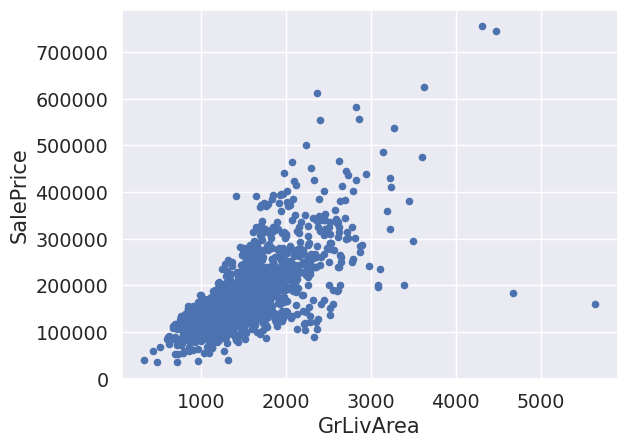

In [168]:
train[['SalePrice','GrLivArea']].plot.scatter(x='GrLivArea', y='SalePrice')

there are two points that seems weird these with large grlivarea and low price because these two points doesn't follow the trend of the data we will drop them

In [169]:
train.loc[train['GrLivArea'].sort_values(ascending=False).index[0:2]]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,...,0,0,0,480,0,1,2008,New,Partial,160000
523,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,10,2007,New,Partial,184750


In [170]:
#we drop the two values that will afect the model badly
train = train.drop(train.loc[train['GrLivArea'].sort_values(ascending=False).index[0:2]].index)

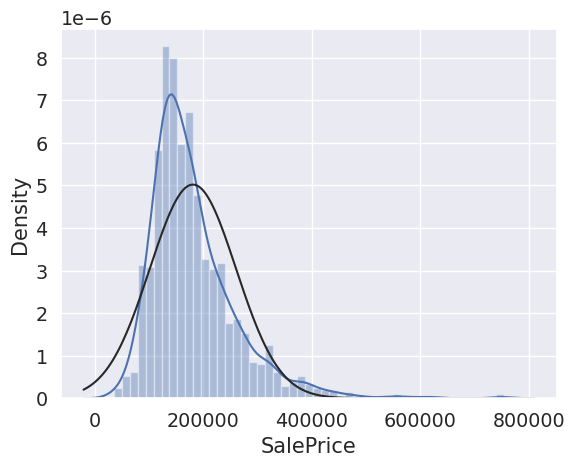

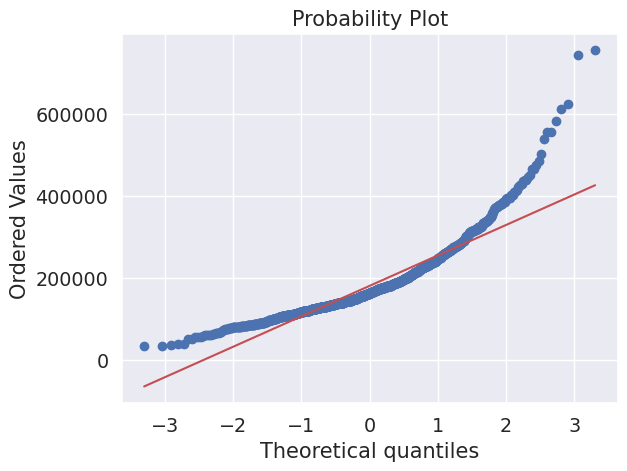

In [171]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

the saleprice has positive skew problem and to solve this making it normal dist we need to apply log transformation

In [172]:
train['SalePrice'] = np.log(train['SalePrice'])

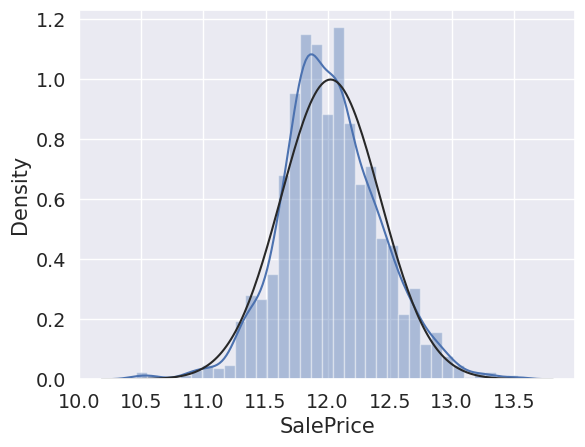

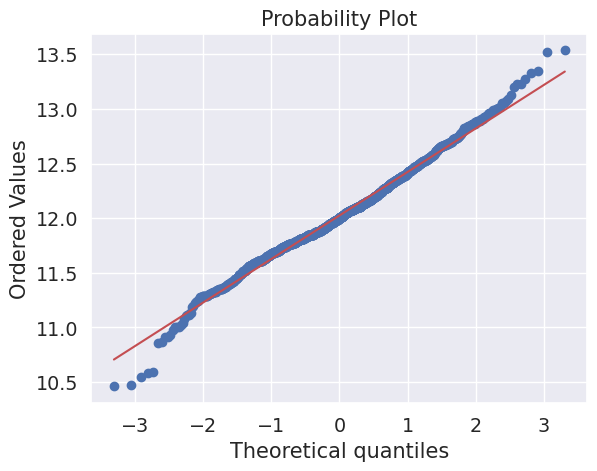

In [173]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

problem solved

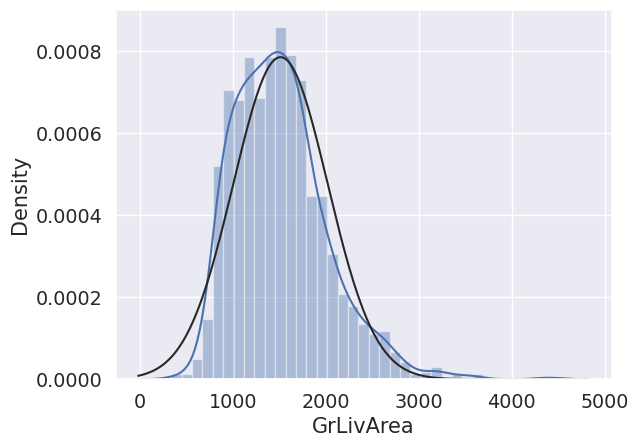

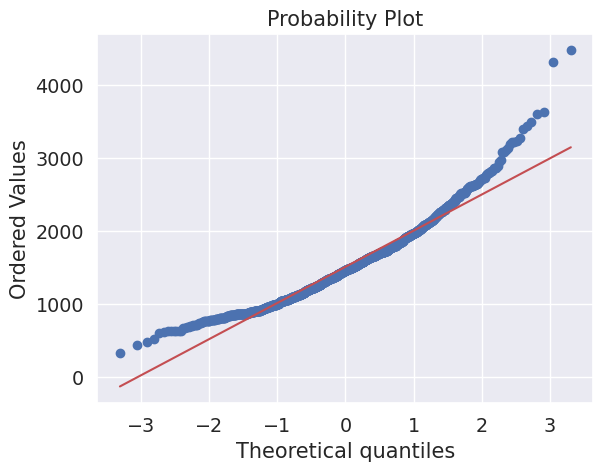

In [174]:
#histogram and normal probability plot
def plot_normality(var='GrLivArea'):
    sns.distplot(train[var], fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[var], plot=plt)
plot_normality()

same problem high skew

In [175]:
train['GrLivArea'] = np.log(train['GrLivArea'])

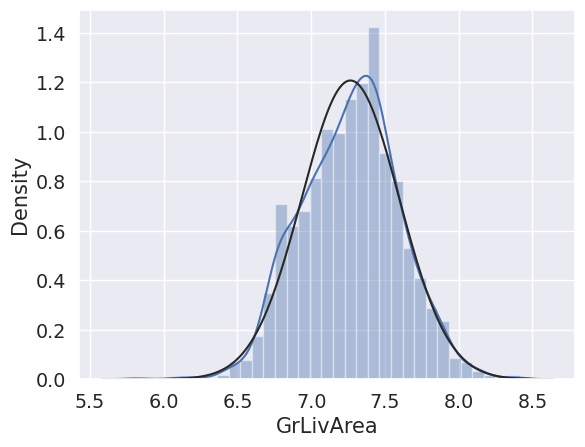

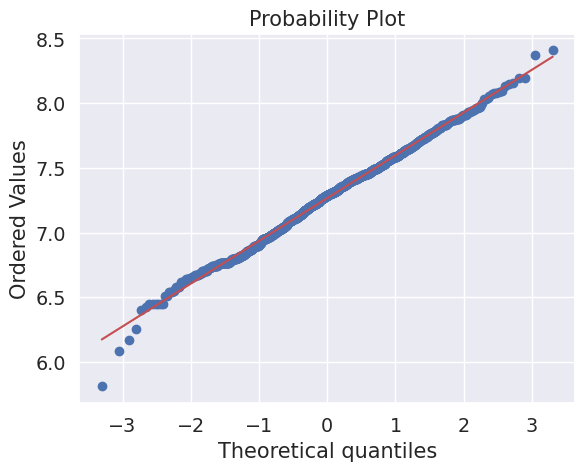

In [176]:
plot_normality()

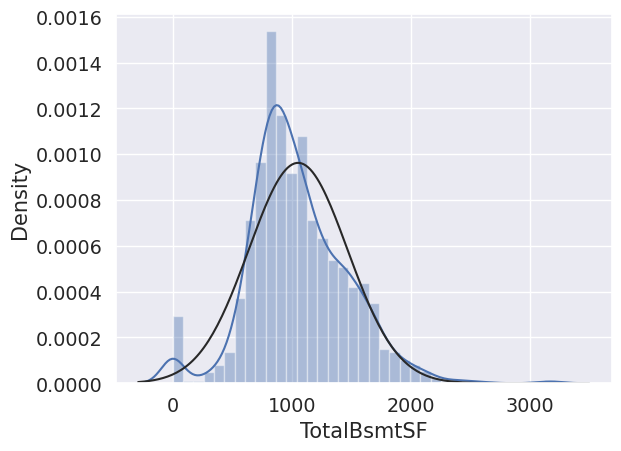

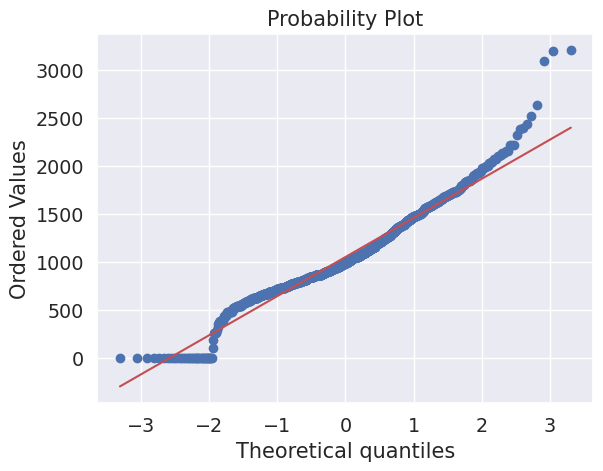

In [177]:
plot_normality('TotalBsmtSF')

In [178]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [179]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
cat_columns = train.select_dtypes(include=['object']).columns
num_columns = list(set(X_train.columns) - set(cat_columns))
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),       # One-hot encode categorical columns
        ('num', StandardScaler(), num_columns)        # Scale numeric columns
    ]
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('regressor', RandomForestRegressor())               # Linear regression model
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation'...
                                                   'OverallQual', 'MiscVal',
                                                   'TotRmsAbvGrd', '2ndFlrSF',
                                                   'Fireplaces', 'WoodDeckSF',
                                                   'GrLivArea', '1stFlrSF',
                                                   'YearRemodAdd',
                                                   'BsmtHalfBath',
                                                   'OpenPorchSF',
                                                   'BsmtFullBath',
                                                   'LowQualFinSF',
                                                   'KitchenAbvGr', 'PoolArea',
                                                   'BsmtFinSF1', '3SsnPorch',
                                                   'BsmtFinSF2',
                                                   'EnclosedPorch',
                                                   'TotalBsmtSF', 'GarageArea',
                                                   'MoSold', 'FullBath',
                                                   'YearBuilt', 'LotArea', ...])])),
                ('regressor', RandomForestRegressor())])

In [180]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred, y_test)

0.00012637289012439322

In [181]:
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)
mean_squared_log_error(y_pred_exp, y_test_exp)

0.020656718424197744

In [182]:
cols_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2',
       'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrArea'],
      dtype='object')

In [183]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [184]:
test = test.drop('Id', axis=1)

In [185]:
test = test.drop(cols_drop, axis=1)

In [186]:
test.isnull().sum().sort_values(ascending=False).head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
KitchenQual     1
TotalBsmtSF     1
SaleType        1
Exterior1st     1
HalfBath        0
BedroomAbvGr    0
FullBath        0
KitchenAbvGr    0
MSSubClass      0
dtype: int64

In [187]:
test2 = test.bfill()

# preprocessing test

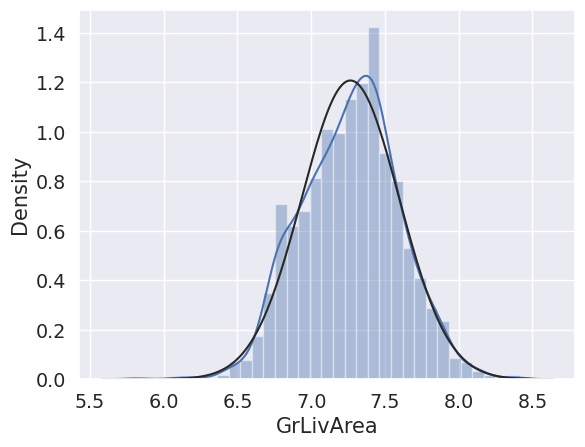

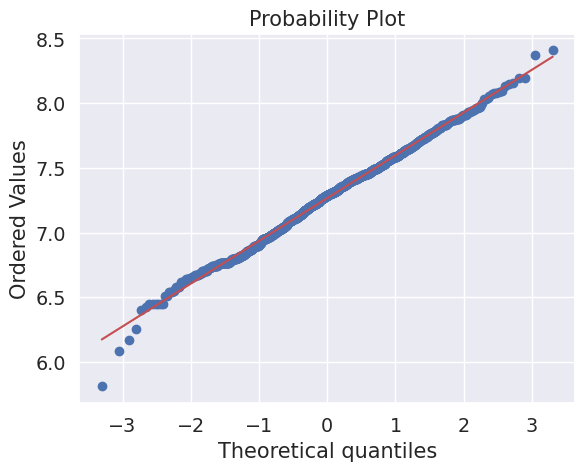

In [188]:
vars = ['TotalBsmtSF','GrLivArea']
var = vars[1]
sns.distplot(train[var], fit=norm);
fig = plt.figure()
res = stats.probplot(train[var], plot=plt)

In [189]:
test2['TotalBsmtSF'] = test2['TotalBsmtSF'].replace(0, 1e-5)

In [190]:
for col in ['TotalBsmtSF','GrLivArea']:
    test2[col] = np.log(test2[col])

In [191]:
test_pred = pipeline.predict(test2)

In [192]:
sub['SalePrice'] = np.exp(test_pred)
sub.to_csv('submission.csv',index=False)

In [193]:
sub

,Id,SalePrice
0,1461,117735.652686
1,1462,143028.795377
2,1463,178785.496857
3,1464,182550.996365
4,1465,188920.259361
...,...,...
1454,2915,84830.118791
1455,2916,85230.304966
1456,2917,150393.054643
1457,2918,108181.069301


In [205]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
cat_columns = train.select_dtypes(include=['object']).columns
num_columns = list(set(X_train.columns) - set(cat_columns))
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),       # One-hot encode categorical columns
        ('num', StandardScaler(), num_columns)        # Scale numeric columns
    ]
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('regressor', LinearRegression())               # Linear regression model
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation'...
                                                   'OverallQual', 'MiscVal',
                                                   'TotRmsAbvGrd', '2ndFlrSF',
                                                   'Fireplaces', 'WoodDeckSF',
                                                   'GrLivArea', '1stFlrSF',
                                                   'YearRemodAdd',
                                                   'BsmtHalfBath',
                                                   'OpenPorchSF',
                                                   'BsmtFullBath',
                                                   'LowQualFinSF',
                                                   'KitchenAbvGr', 'PoolArea',
                                                   'BsmtFinSF1', '3SsnPorch',
                                                   'BsmtFinSF2',
                                                   'EnclosedPorch',
                                                   'TotalBsmtSF', 'GarageArea',
                                                   'MoSold', 'FullBath',
                                                   'YearBuilt', 'LotArea', ...])])),
                ('regressor', LinearRegression())])

In [206]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred, y_test)

9.652564301435242e-05

In [207]:
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)
mean_squared_log_error(y_pred_exp, y_test_exp)

0.0159699190048056

In [208]:
test_pred = pipeline.predict(test2)

In [209]:
sub['SalePrice'] = np.exp(test_pred)
sub.to_csv('submission.csv',index=False)
sub

,Id,SalePrice
0,1461,105817.933713
1,1462,145406.712105
2,1463,167765.917611
3,1464,182551.023683
4,1465,175851.491875
...,...,...
1454,2915,81008.624256
1455,2916,78197.906104
1456,2917,148743.053563
1457,2918,108094.656680


In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
cat_columns = train.select_dtypes(include=['object']).columns
num_columns = list(set(X_train.columns) - set(cat_columns))
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),       # One-hot encode categorical columns
        ('num', StandardScaler(), num_columns)        # Scale numeric columns
    ]
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),                 # Preprocessing step
     ('regressor', MLPRegressor(hidden_layer_sizes=(60,20),            # Neural network with 2 layers
                               activation='relu',                      # ReLU activation
                               solver='adam',                          # Adam optimizer
                               max_iter=500,                           # Number of iterations
                               random_state=42)) 
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation'...
                                                   'Fireplaces', 'WoodDeckSF',
                                                   'GrLivArea', '1stFlrSF',
                                                   'YearRemodAdd',
                                                   'BsmtHalfBath',
                                                   'OpenPorchSF',
                                                   'BsmtFullBath',
                                                   'LowQualFinSF',
                                                   'KitchenAbvGr', 'PoolArea',
                                                   'BsmtFinSF1', '3SsnPorch',
                                                   'BsmtFinSF2',
                                                   'EnclosedPorch',
                                                   'TotalBsmtSF', 'GarageArea',
                                                   'MoSold', 'FullBath',
                                                   'YearBuilt', 'LotArea', ...])])),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(60, 20), max_iter=500,
                              random_state=42))])

In [200]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_pred, y_test)

0.0003529319661403693

In [201]:
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)
mean_squared_log_error(y_pred_exp, y_test_exp)

0.06093076833798311

In [202]:
test_pred = pipeline.predict(test2)

In [203]:
sub['SalePrice'] = np.exp(test_pred)
sub.to_csv('submission.csv',index=False)
sub

,Id,SalePrice
0,1461,115498.271542
1,1462,34695.139758
2,1463,204901.706183
3,1464,198144.844688
4,1465,189085.611785
...,...,...
1454,2915,131833.527284
1455,2916,93365.876351
1456,2917,188211.069212
1457,2918,158295.258264


In [204]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')